In [6]:
# Import necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
import numpy as np
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Dataset shape: (50000, 2)
Sample of the first 5 rows:
                                              review sentiment
0  I wonder how many MINI Cooper automobiles were...  positive
1  Aparna Sen's 15 Park Avenue is a film about na...  positive
2  Although it's definitely an enjoyable way to s...  positive
3  Unlike what one reviewer said this is NOT a ri...  negative
4  While it's true that the movie is somewhat int...  negative
Number of reviews: 50000
Number of positive reviews: 25000
Number of negative reviews: 25000
Random sample before preprocessing:
I love cheesy horror flicks. I don't care if the acting is sub-par or whether the monsters look corny. I liked this movie except for the bewildered feeling all the way from the beginning of the film to the very end. Look, I don't need a 10 page dissertation or a sign with big letters explaining a plot to me. But Dark Floors takes the "what is this movie about?" thing to a whole new (annoying) level. What IS this movie about?<br /><br /

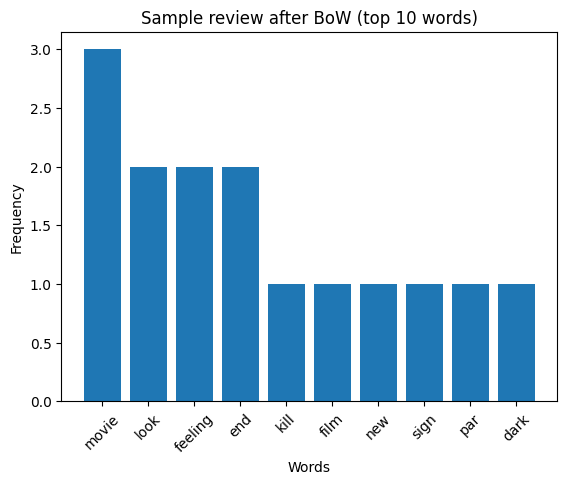

In [7]:
# Load the dataset
df = pd.read_csv('./IMDB Dataset.csv')

# Shuffle the dataset and reset the index
df = df.sample(frac=1, random_state=21).reset_index(drop=True)
print(f'Dataset shape: {df.shape}')
print(f'Sample of the first 5 rows:')
print(df.head())

# Split the dataset into features and target variable, map positive sentiment to 1 and negative sentiment to 0
X = df['review'].values
y = df['sentiment'].map({'negative': 0, 'positive': 1}).values
print(f'Number of reviews: {len(X)}')
print(f'Number of positive reviews: {sum(y)}')
print(f'Number of negative reviews: {len(y) - sum(y)}')

# Split the dataset into training and testing set with a ratio of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(f'Random sample before preprocessing:\n{X_train[1]}')

# Remove HTML tags, URLs and characters using regular expressions
def preprocess_text(text):
      text = re.sub('<br />', '', text)
      text = re.sub(r'https?://\S+ | www\. \S+', '', text)
      return text

# Preprocess the training and testing set
X_train = np.array([preprocess_text(text) for text in X_train])
X_test = np.array([preprocess_text(text) for text in X_test])
print(f'Random sample after preprocessing:\n{X_train[1]}')

# Extract the features from the documents using the bag-of-words (BoW) model and keep only the 5000 most frequent words
stop_words = stopwords.words('english')
count_vectorizer = CountVectorizer(stop_words=stop_words, max_features=5000)
X_train_bow = count_vectorizer.fit_transform(X_train)
X_test_bow = count_vectorizer.transform(X_test)
print(f'X_train shape: {X_train_bow.shape}'
      f'\nX_test shape: {X_test_bow.shape}'
      f'\ny_train shape: {y_train.shape}'
      f'\ny_test shape: {y_test.shape}')
print(f'Sample review after BoW:\n')

# Get the indices of the first 10 words with highest frequency in the sample review
top_10_indices = np.argsort(-X_train_bow[1].toarray().flatten())[:10]

# Get the words corresponding to the indices of the top 10 words with highest frequency in the sample review
top_10_words = [count_vectorizer.get_feature_names_out()[i] for i in top_10_indices]

# Get the frequencies of the top 10 words with highest frequency in the sample review
top_10_frequencies = X_train_bow[1].toarray().flatten()[top_10_indices]

# Plot the histogram
plt.bar(top_10_words, top_10_frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Sample review after BoW (top 10 words)')
plt.xticks(rotation=45)
plt.show()

Examples of correctly classified reviews for Multinomial Naive Bayes:
Review:
This is by far one of the best films that India has ever made. Following are the plus points of the film...Wonderful direction, cinematography and editing, the editing is very smooth and the timing of changeovers is excellent.Even though the film shows the life of Mumbai Policemen and their hardships, it never gets boring or sympathetic.Mind-blowing acting by lead actor Nana Patekar. One can surely hope that he gets nominated for the Best actor for the academy awards.Controlled violence. The violence is controlled and the film doesn't become a bloody mess.No stupid songs as in usual Indian movies.

Predicted sentiment: 1, Real sentiment: 1

Review:
In watching Enterprise for the first time, as we all no doubt do with all shows, I went into it with an open mind, enjoying about half of the past Star Trek efforts and disliking the other half.Enterprise has fallen short, but this episode "A Night In Sickbay" made

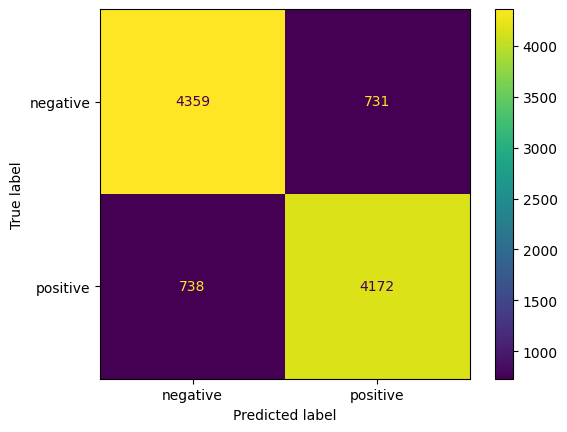

Examples of correctly classified reviews for Logistic Regression:
Review:
This is by far one of the best films that India has ever made. Following are the plus points of the film...Wonderful direction, cinematography and editing, the editing is very smooth and the timing of changeovers is excellent.Even though the film shows the life of Mumbai Policemen and their hardships, it never gets boring or sympathetic.Mind-blowing acting by lead actor Nana Patekar. One can surely hope that he gets nominated for the Best actor for the academy awards.Controlled violence. The violence is controlled and the film doesn't become a bloody mess.No stupid songs as in usual Indian movies.

Predicted sentiment: 1, Real sentiment: 1

Review:
In watching Enterprise for the first time, as we all no doubt do with all shows, I went into it with an open mind, enjoying about half of the past Star Trek efforts and disliking the other half.Enterprise has fallen short, but this episode "A Night In Sickbay" made me 

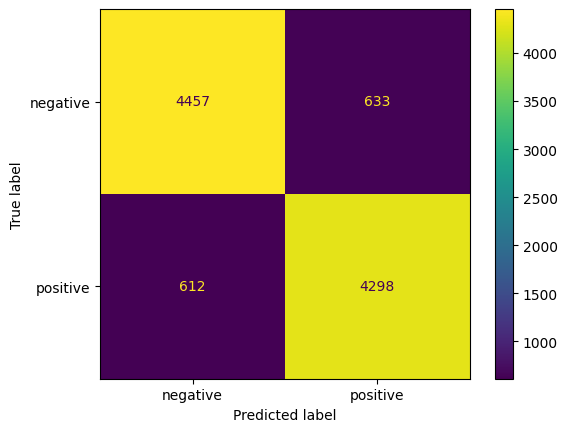

Examples of correctly classified reviews for SGDClassifierLR:
Review:
This is by far one of the best films that India has ever made. Following are the plus points of the film...Wonderful direction, cinematography and editing, the editing is very smooth and the timing of changeovers is excellent.Even though the film shows the life of Mumbai Policemen and their hardships, it never gets boring or sympathetic.Mind-blowing acting by lead actor Nana Patekar. One can surely hope that he gets nominated for the Best actor for the academy awards.Controlled violence. The violence is controlled and the film doesn't become a bloody mess.No stupid songs as in usual Indian movies.

Predicted sentiment: 1, Real sentiment: 1

Review:
In watching Enterprise for the first time, as we all no doubt do with all shows, I went into it with an open mind, enjoying about half of the past Star Trek efforts and disliking the other half.Enterprise has fallen short, but this episode "A Night In Sickbay" made me seri

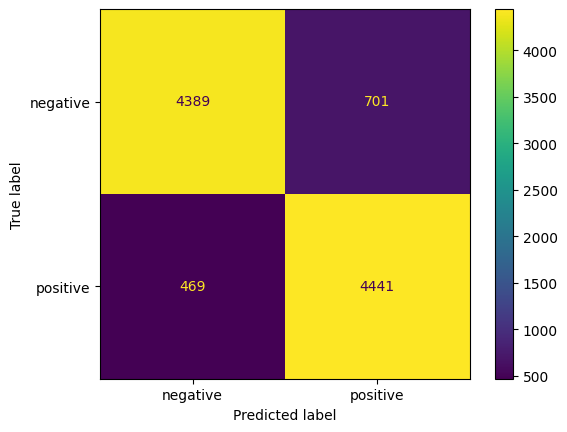

Examples of correctly classified reviews for SVM:
Review:
This is by far one of the best films that India has ever made. Following are the plus points of the film...Wonderful direction, cinematography and editing, the editing is very smooth and the timing of changeovers is excellent.Even though the film shows the life of Mumbai Policemen and their hardships, it never gets boring or sympathetic.Mind-blowing acting by lead actor Nana Patekar. One can surely hope that he gets nominated for the Best actor for the academy awards.Controlled violence. The violence is controlled and the film doesn't become a bloody mess.No stupid songs as in usual Indian movies.

Predicted sentiment: 1, Real sentiment: 1

Review:
In watching Enterprise for the first time, as we all no doubt do with all shows, I went into it with an open mind, enjoying about half of the past Star Trek efforts and disliking the other half.Enterprise has fallen short, but this episode "A Night In Sickbay" made me seriously questi

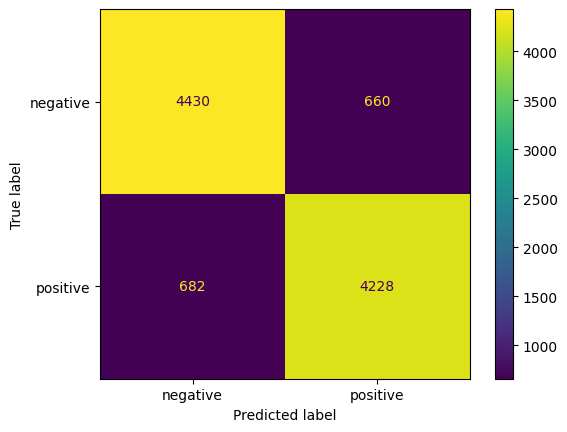

Examples of correctly classified reviews for SGDClassifierSVM:
Review:
This is by far one of the best films that India has ever made. Following are the plus points of the film...Wonderful direction, cinematography and editing, the editing is very smooth and the timing of changeovers is excellent.Even though the film shows the life of Mumbai Policemen and their hardships, it never gets boring or sympathetic.Mind-blowing acting by lead actor Nana Patekar. One can surely hope that he gets nominated for the Best actor for the academy awards.Controlled violence. The violence is controlled and the film doesn't become a bloody mess.No stupid songs as in usual Indian movies.

Predicted sentiment: 1, Real sentiment: 1

Review:
In watching Enterprise for the first time, as we all no doubt do with all shows, I went into it with an open mind, enjoying about half of the past Star Trek efforts and disliking the other half.Enterprise has fallen short, but this episode "A Night In Sickbay" made me ser

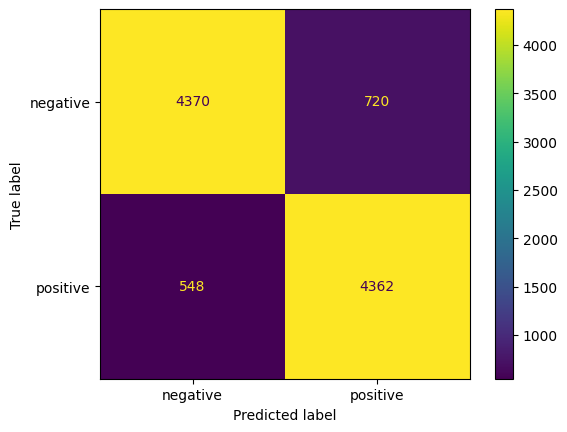

In [8]:
# Define the classifiers
classifiers = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=21),
    "SGDClassifierLR": SGDClassifier(loss='log_loss', max_iter=10000, random_state=21),
    "SVM": LinearSVC(random_state=21, max_iter=10000, dual='auto'),
    "SGDClassifierSVM": SGDClassifier(loss='hinge', random_state=21),
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_bow, y_train)
    predictions = clf.predict(X_test_bow)
    
    # Get correctly classified reviews
    correct_indices = np.where(predictions == y_test)[0]
    correct_reviews_original = np.array(X_test)[correct_indices]
    
    # Print the results
    print(f"Examples of correctly classified reviews for \033[1m{name}\033[0m:")
    print("Review:")
    print(correct_reviews_original[0])
    print(f'\nPredicted sentiment: {predictions[correct_indices[0]]}, Real sentiment: {y_test[correct_indices[0]]}\n')
    print("Review:")
    print(correct_reviews_original[10])
    print(f'\nPredicted sentiment: {predictions[correct_indices[10]]}, Real sentiment: {y_test[correct_indices[10]]}\n')
    
    # Get misclassified reviews
    misclassified_indices = np.where(predictions != y_test)[0]
    misclassified_reviews_original = np.array(X_test)[misclassified_indices]

    # Print the results
    print(f"Examples of misclassified reviews for \033[1m{name}\033[0m:")
    print("Review:")
    print(misclassified_reviews_original[0])
    print(f'\nPredicted sentiment: {predictions[misclassified_indices[0]]}, Real sentiment: {y_test[misclassified_indices[0]]}\n')
    print("Review:")
    print(misclassified_reviews_original[10])
    print(f'\nPredicted sentiment: {predictions[misclassified_indices[10]]}, Real sentiment: {y_test[misclassified_indices[10]]}\n')
        
    # Print the classification report and confusion matrix
    print(f"Classification report and confusion matrix for \033[1m{name}\033[0m:")
    ConfusionMatrixDisplay(confusion_matrix(y_test, predictions, labels=[0, 1]), display_labels=['negative', 'positive']).plot()
    print(classification_report(y_test, predictions, labels=[0, 1], target_names=['negative', 'positive']))
    plt.show()
